In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Generate random graphs for clusters 

In [3]:
reps = [nx.random_regular_graph(d=2, n=10) for i in range(3)]

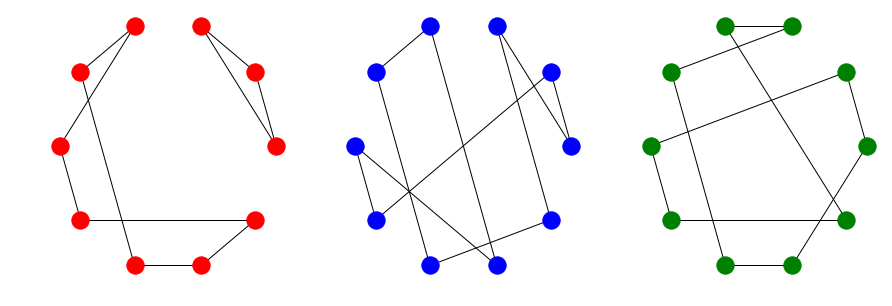

In [44]:
fig, axs = plt.subplots(1,3, figsize=(15,5))
colors = ['red', 'blue', 'green']
for i,r in enumerate(reps):
    nx.draw_circular(r, ax=axs[i], node_color=colors[i])
plt.savefig("cluster_representative.png", transparent=True, dpi=200, bbox_inches='tight')
plt.show()

In [33]:
# generate 10 graphs per cluster that always have that patter plus some edges 

graphs = []
for r in reps:
    for i in range(10):
        A = nx.adjacency_matrix(r).todense()
        zero= np.where(A==0)
        
        ixs = np.arange(0, zero[0].size)
        np.random.shuffle(ixs)
        for _from, _to in zip(zero[0][ixs][:3], zero[1][ixs][:3]):
            A[_from, _to] = 1
            A[_to, _from] = 1
        graphs.append(A)

----------------------
----------------------
----------------------


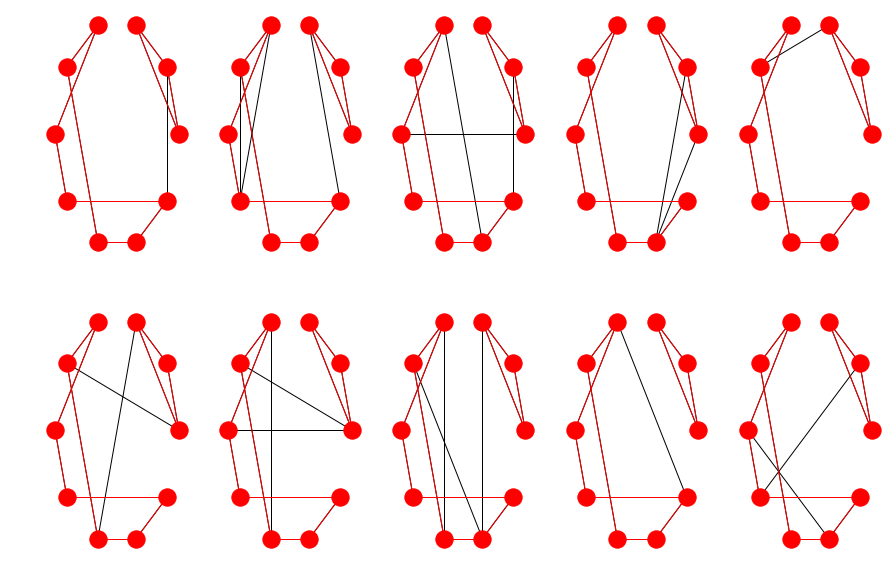

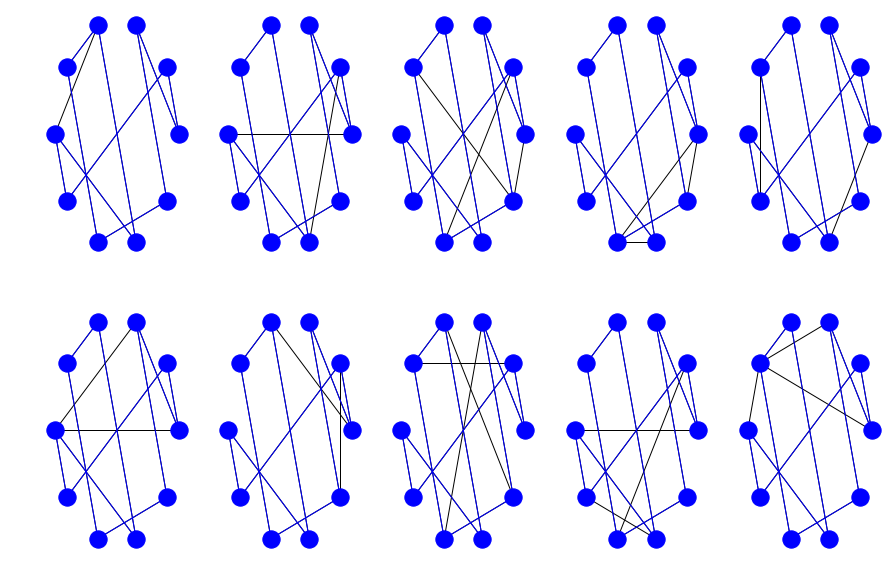

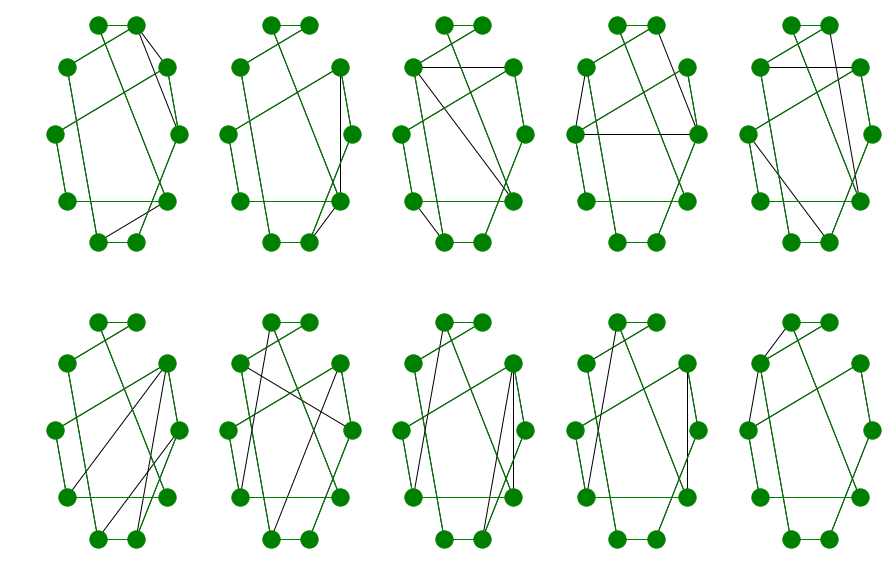

In [45]:
for i in range(3):
    fig, ax = plt.subplots(2, 5, figsize=(15,10))
    for row in range(2):
        for col in range(5):
            G = nx.from_numpy_array(graphs[i*10+row*5+col])
            nx.draw_circular(G, ax=ax[row, col], node_color=colors[i])
            nx.draw_networkx_edges(reps[i], ax=ax[row, col], pos=nx.circular_layout(reps[i]), edge_color=colors[i])
    plt.savefig("members_of_cluster_"+str(i)+".png", transparent=True, dpi=200, bbox_inches='tight')
    plt.plot()
    print("----------------------")

# Code for k-means on graphs

In [93]:
def get_representative(graphs):
    bin_graphs = []
    for g in graphs:
        g_bin = (g.copy()!=0).astype(int)
        bin_graphs.append(g_bin)
    sum_graph = np.zeros_like(g_bin)
    for g in bin_graphs:
        sum_graph += g
    return (sum_graph == len(graphs)).astype(int)

In [61]:
def compute_distances(graphs, reps):
    distances = np.zeros((len(graphs), len(reps)))

    for i, g in enumerate(graphs):
        for j, r in enumerate(reps):
            b_g = (g!=0).astype(int)
            b_r = (r!=0).astype(int)
            diff = b_r - b_g
            how_many_plus = np.where(diff == -1)[0].size/2
            how_many_less = np.where(diff == 1)[0].size/2
            distances[i,j] = how_many_plus + 2*how_many_less
    return distances

In [146]:
import warnings
def graph_k_means(graphs, k, max_iter=10):
    ixs = np.arange(0, len(graphs))
    np.random.shuffle(ixs)
    repres = np.array(graphs)[np.array(ixs[:k])]
    
    labels_prev = [-1]*len(graphs)
    for iter_ in range(max_iter):
        distances = compute_distances(graphs, repres)
        print(distances)
        normalized_distances = distances/np.max(distances, axis=1)[:, np.newaxis]
        similarities = 1 - normalized_distances
        print(similarities)
        kernel = similarities.dot(similarities.T)
        plt.imshow(kernel)
        plt.show()
        labels = np.argmin(distances, axis=1)
        repres = [get_representative(np.array(graphs)[np.where(labels==v)]) for v in np.unique(labels)]
        if np.all(labels == labels_prev):
            break
        print(labels)
        labels_prev = labels.copy()
    else:
        warnings.warn("The algorithm did not converge.")

[[19.  18.   7. ]
 [20.  16.   8. ]
 [20.  16.   8. ]
 [19.  18.   7. ]
 [19.  16.5  7. ]
 [22.5 18.5  0. ]
 [23.  19.   5. ]
 [23.  19.   8. ]
 [19.  18.   7. ]
 [21.  11.   7.5]
 [26.5  0.  19. ]
 [28.5  6.5 22.5]
 [29.   7.  23. ]
 [26.   7.  20. ]
 [25.5  6.5 22.5]
 [27.   5.  22.5]
 [25.5  6.5 21. ]
 [26.   7.  20. ]
 [29.   7.  23. ]
 [26.   7.  20. ]
 [ 8.  22.  17. ]
 [ 3.  26.  19.5]
 [ 8.  28.  23. ]
 [ 8.  25.  20. ]
 [ 8.  22.  23. ]
 [ 8.  25.  23. ]
 [ 5.  28.  20. ]
 [ 2.  28.  23. ]
 [ 0.  26.  22.5]
 [ 7.5 24.5 19.5]]
[[0.         0.05263158 0.63157895]
 [0.         0.2        0.6       ]
 [0.         0.2        0.6       ]
 [0.         0.05263158 0.63157895]
 [0.         0.13157895 0.63157895]
 [0.         0.17777778 1.        ]
 [0.         0.17391304 0.7826087 ]
 [0.         0.17391304 0.65217391]
 [0.         0.05263158 0.63157895]
 [0.         0.47619048 0.64285714]
 [0.         1.         0.28301887]
 [0.         0.77192982 0.21052632]
 [0.         0.75862069 0.2

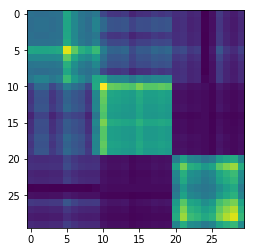

[2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
[[17.  17.   2. ]
 [18.  15.   3. ]
 [18.  15.   3. ]
 [14.  17.   2. ]
 [14.  17.   2. ]
 [17.5 17.5  2.5]
 [18.  18.   3. ]
 [18.  18.   3. ]
 [14.  17.   2. ]
 [17.5 11.5  2.5]
 [23.   2.  14. ]
 [23.5  2.5 17.5]
 [24.   3.  18. ]
 [21.   3.  15. ]
 [20.5  2.5 17.5]
 [23.5  2.5 17.5]
 [23.5  2.5 17.5]
 [21.   3.  18. ]
 [24.   3.  18. ]
 [21.   3.  18. ]
 [ 3.  18.  12. ]
 [ 2.5 23.5 14.5]
 [ 3.  24.  18. ]
 [ 3.  21.  15. ]
 [ 3.  18.  18. ]
 [ 3.  21.  18. ]
 [ 3.  24.  18. ]
 [ 3.  24.  18. ]
 [ 2.5 23.5 17.5]
 [ 2.5 20.5 14.5]]
[[0.         0.         0.88235294]
 [0.         0.16666667 0.83333333]
 [0.         0.16666667 0.83333333]
 [0.17647059 0.         0.88235294]
 [0.17647059 0.         0.88235294]
 [0.         0.         0.85714286]
 [0.         0.         0.83333333]
 [0.         0.         0.83333333]
 [0.17647059 0.         0.88235294]
 [0.         0.34285714 0.85714286]
 [0.         0.91304348 0.39130435]
 

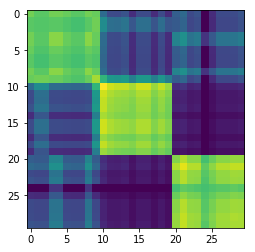

In [147]:
graph_k_means(graphs, 3)

# Inserimento in EM per inferenza grafi

In [ ]:

#un alternativa e' applicare kmeans fino a convergenza per calcolarsiil kernel
# computazionalmente e' meno efficiente e non sono sicura sia "utile", si puo' sempre provare pero'

# traccia della struttura dell'algoritmo definitivo
def clustering_inference(X, k, max_iter, add_temporal_similarity_prior=True):
    
    # fai cose preliminari 
    # il primo giro e' esterno per inizializzare la situa 
    # inferisci i grafi senza nessun prior sul kernel --> tutti si assomigliano equamente con tutti
    if add_temporal_similarity_prior:
        # il kernel iniziale e' un gaussiano con varianza abbastanza stretta

    ixs = np.arange(0, len(graphs))
    np.random.shuffle(ixs)
    repres = np.array(graphs)[np.array(ixs[:k])]
    for iter_ in range(max_iter):
        
        distances = compute_distances(graphs, repres)
        similarities = 1 - (distances/np.max(distances, axis=1)[:, np.newaxis])
        kernel = similarities.dot(similarities.T)
        if add_temporal_similarity_prior:
            # aggiungi al kernel la similarita' temporale 
        plt.imshow(kernel) # se vuoi vedere il kernel risultante 
        plt.show()
        
        # ottieni i nuovi rappresentanti
        labels = np.argmin(distances, axis=1)
        repres = [get_representative(np.array(graphs)[np.where(labels==v)]) for v in np.unique(labels)]
        
        # ottieni i nuovi grafi dato il kernel
        
        if condition: # e' stabile quando la likelihood del modello non si muove piu'
            break
    else:
        warnings.warn("The algorithm did not converge.")
